# Gensim Doc2vec in FakeNews research


In [3]:
import gensim
import os
import collections
import smart_open
import random
import pandas as pd
from gensim.models import Doc2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

/Users/artem/miniforge3/envs/death_star/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /Users/artem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Функции для лексиграфической очистки всех строк в данных
def decontracted(string):
    # specific
    string = re.sub(r"won\'t", "will not", string)
    string = re.sub(r"can\'t", "can not", string)

    # general
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    return string

def clean_str(string):
    """
    Cleaning of dataset
    """
    stop = stopwords.words('english')
    
    string = string.str.lower()
    
    string = string.apply(lambda elem: decontracted(elem))
    
    #remove special characters
    string = string.apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    
    # remove numbers
    string = string.apply(lambda elem: re.sub(r"\d+", "", elem))
    
    #remove stopwords
    string = string.apply(lambda x: ' '.join([word.strip() for word in x.split() if word not in (stop)]))
    
    return string

def clean_string(string):
    
    stop = stopwords.words('english')
    string = string.lower()
    string = re.sub(r'([^\w\s]|_)','', string)
    
    text = [word.strip() for word in string.split() if word not in stop]
        
    return text



In [5]:
def textpreproc(data, columns): 
    texts = []
    labels = []
     
    
    texts = clean_str(data[columns[0]]) + " " + clean_str(data[columns[1]])

    return texts

In [28]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
random.shuffle(sorted_names)
print(sorted_names)

['mediumvioletred', 'royalblue', 'greenyellow', 'lavender', 'lightcoral', 'seashell', 'burlywood', 'slategray', 'oldlace', 'darkgray', 'thistle', 'mediumaquamarine', 'paleturquoise', 'mediumblue', 'dimgray', 'papayawhip', 'darkgreen', 'mediumpurple', 'moccasin', 'steelblue', 'tomato', 'mediumspringgreen', 'orange', 'lightslategrey', 'palegreen', 'darkslategray', 'coral', 'darkblue', 'orangered', 'rosybrown', 'powderblue', 'darkslategrey', 'goldenrod', 'lightgrey', 'lightskyblue', 'cyan', 'b', 'mediumturquoise', 'tan', 'lime', 'palegoldenrod', 'rebeccapurple', 'grey', 'chocolate', 'mintcream', 'ghostwhite', 'indigo', 'red', 'blanchedalmond', 'deeppink', 'mediumseagreen', 'sandybrown', 'firebrick', 'lightyellow', 'y', 'mediumslateblue', 'cornflowerblue', 'lightseagreen', 'white', 'lightslategray', 'black', 'salmon', 'darkmagenta', 'beige', 'khaki', 'crimson', 'dodgerblue', 'lightgreen', 'orchid', 'seagreen', 'fuchsia', 'lightgray', 'silver', 'indianred', 'cornsilk', 'antiquewhite', 'plum

In [1]:
def analyze_texts(texts, NUM_CLUSTERS): 
    levels = range(32,256,32)

    colours = sorted_names
    
    X = []
    for text in texts:
        X.append(model.infer_vector(text.split()))
    kmeans_model = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', random_state = 42)  
    kmeans_model.fit(X)
    
    labels=kmeans_model.labels_.tolist()

    pca = PCA(n_components=2).fit(X)
    datapoint = pca.transform(X)

    plt.figure(figsize=(8,8))
    color = [colours[i] for i in labels]
    
    plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
    
    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c="#000000")
    plt.show()
    
    return labels


In [7]:
from collections import Counter 

def cluster_to_topics(id, texts, labels):
    words = []
    arr = []
    
    for i in range(0, len(labels)):
        if (labels[i] == id):
            arr.append(texts[i])
            
    for text in arr:
        for elem in clean_string(text):
            words.append(elem)
    count = Counter(words)
    print(count.most_common()[:10])

In [ ]:
def extract_topics()

In [18]:
newsIsot_true = pd.read_csv("True_ISOT.csv")
newsIsot_fake = pd.read_csv("Fake_ISOT.csv")

textsISOT = textpreproc(pd.concat([newsIsot_true, newsIsot_fake]), ['title', 'text'])
text_ISOTfake = textpreproc(newsIsot_fake, ['title', 'text'])
print(textsISOT.shape)

(44898,)


In [141]:
textsISOT.shape

(44898,)

In [19]:
covid_texts = pd.read_excel('COVID_news.xlsx')['text']


print(clean_string(covid_texts[1]))


['officially', 'put', 'rest', 'comparisons', 'covid19', 'influenza', 'coronavirus', 'killing', 'americans', 'flu', 'almost', 'everything', 'else', 'according', 'data', 'compiled', 'washington', 'post', 'covid19', 'secondleading', 'cause', 'death', 'america', 'upward', 'march', 'numbers', 'steady', 'disturbing', 'week', 'march', '16', 'covid19', 'didnt', 'rank', 'among', '15', 'common', 'causes', 'death', 'next', 'week', 'ranked', 'seventh', 'following', 'week', 'moved', 'third', 'week', 'april', '6', 'covid19', 'killed', 'people', 'anything', 'besides', 'heart', 'disease', 'numbers', 'tragic', 'milestone', 'theyre', 'also', 'verdict', 'attempts', 'downplay', 'severity', 'event', 'messaging', 'political', 'leaders', 'media', 'voices', 'early', 'outbreak', 'comparing', 'flu', 'wrong', 'might', 'wellintentioned', 'efforts', 'keep', 'people', 'panicking', 'point', 'moot', 'coronavirus', 'formidable', 'public', 'health', 'threat', 'generation', 'time', 'minimizing', 'time', 'aggressive', 't

In [33]:
texts = pd.concat([textsISOT, covid_texts])

0       us budget fight looms republicans flip fiscal ...
1       us military accept transgender recruits monday...
2       senior us republican senator let mr mueller jo...
3       fbi russia probe helped australian diplomat ti...
4       trump wants postal service charge amuch amazon...
                              ...                        
3114    Quarantine advised for 80 persons across the S...
3115    South Sudan has begun screening all travelers ...
3116    Coronavirus (2019-nCoV) is a new respiratory i...
3117    Characterizing Patients Hospitalized With COVI...
3118    Just something to be prepared for… but then it...
Length: 48017, dtype: object


In [31]:
print(news_true.subject.unique(), news_fake.subject.unique())

['politicsNews' 'worldnews'] ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [16]:
text_corpus = []
LabeledText = gensim.models.doc2vec.TaggedDocument
i=0


for elem in texts:
    text_corpus.append(LabeledText(elem,[i]))
    i+=1

model = Doc2Vec(vector_size=100, dbow_words= 1, dm=0, window=5, seed=1337, min_count=300, workers=4,alpha=0.025, min_alpha=0.025)

model.build_vocab(text_corpus)
for epoch in range(10):
    print("epoch "+str(epoch))
    model.train(text_corpus, total_examples=i, epochs=1)
    model.save('cyber-trend-index-dataset.model')
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


In [321]:
text_corpus[:1]

[TaggedDocument(words='us budget fight looms republicans flip fiscal script washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republicans us representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases nondefense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending percent meadows chairman s

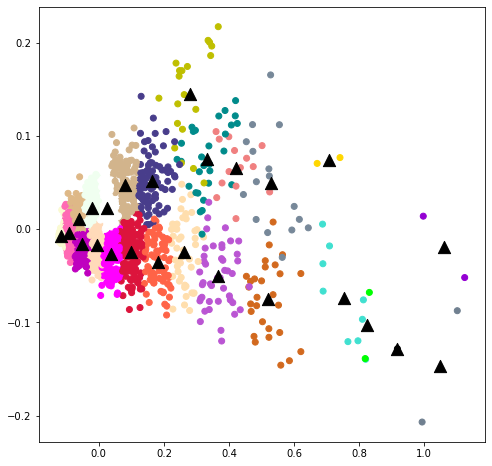

[('virus', 442), ('china', 305), ('coronavirus', 279), ('health', 209), ('corona', 209), ('people', 201), ('cases', 193), ('new', 169), ('chinese', 161), ('also', 141)]
None
[('virus', 754), ('china', 660), ('coronavirus', 585), ('health', 512), ('said', 455), ('people', 379), ('new', 323), ('also', 300), ('wuhan', 290), ('corona', 282)]
None
[('virus', 1082), ('china', 838), ('health', 753), ('said', 642), ('coronavirus', 595), ('corona', 540), ('people', 472), ('cases', 396), ('outbreak', 348), ('also', 335)]
None
[('virus', 488), ('people', 353), ('coronavirus', 275), ('china', 262), ('health', 218), ('cases', 200), ('wuhan', 194), ('new', 175), ('spread', 156), ('corona', 156)]
None
[('coronavirus', 204), ('china', 134), ('virus', 121), ('us', 102), ('new', 96), ('sars', 93), ('wuhan', 86), ('chinese', 86), ('one', 85), ('first', 80)]
None
[('virus', 398), ('china', 295), ('people', 213), ('corona', 139), ('us', 127), ('wuhan', 117), ('coronavirus', 115), ('country', 113), ('chines

In [373]:
labels = analyze_texts(covid_texts, 25)
for i in range(25):
    print(cluster_to_topics(i, covid_texts, labels))

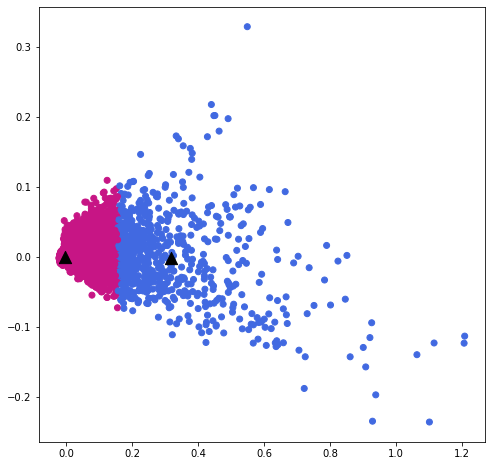

In [39]:

labels = analyze_texts(texts, 2)


In [25]:
print(covid_texts[0])

Facebook has shuttered a popular group for Michiganders who oppose their governor’s extreme lockdown measures, fueling debate about free speech during the coronavirus crisis.

‘Michiganders Against Excessive Quarantine’ had more than 380,000 members, with media reports describing it as one of the largest anti-lockdown groups in the nation. It’s not clear if Facebook has provided an explanation for the group’s removal.

Visiting the page gives the following message: “Sorry, this content isn’t available right now.”

Garrett Soldano of Mattawan, Michigan created Michiganders Against Excessive Quarantine in April after becoming disenchanted with Governor Gretchen Whitmer’s stay-at-home order – a policy which he initially supported.

The group made headlines around the world after organizing ‘Operation Gridlock’, a protest in which thousands of cars created bumper-to-bumper traffic in the capital, Lansing.

Protesters were encouraged to stay in their automobiles and adhere to social distanc

In [17]:
analyze_texts(textISOT[:3000], 6)

NameError: name 'textISOT' is not defined

In [ ]:
analyze_texts(pd.concat())

In [165]:
test_vector = model.infer_vector(textsISOT[1])
print("V1_infer", test_vector)

# to find most similar doc using tags
similar_doc = model.dv.most_similar([test_vector])
print(similar_doc)

V1_infer [-1.0864186e-03 -2.8770377e-03  1.9958145e-03  1.2470394e-03
 -2.2138683e-03 -3.6284060e-04 -3.8906962e-03  4.8448057e-03
  1.5239483e-03 -3.5726249e-03  3.6529608e-03  9.0837298e-04
 -2.5361567e-04 -1.6009712e-03 -3.5908208e-03 -3.0524540e-03
  4.0258425e-03  1.2395453e-03  4.2001116e-03  1.8733341e-03
  2.2382564e-03  5.7654618e-04 -1.0492057e-04  1.9302636e-03
  4.4724648e-03  5.8598933e-04 -4.9721701e-03  1.8880272e-03
  1.7168683e-03 -4.6911160e-03  1.2266082e-03  2.1693974e-03
  4.1107275e-03  3.7337798e-03 -8.1307354e-04 -2.6223350e-03
 -4.3497807e-03  3.7272458e-03 -8.0136536e-04 -1.5119395e-03
 -1.3405535e-03  2.1630067e-03  2.2360010e-03 -1.7705366e-03
  3.0160386e-03 -4.0698522e-03  4.5539825e-03 -9.6015813e-04
 -3.6350179e-03 -4.2223926e-03 -2.1183086e-03  4.9274566e-04
 -1.4228496e-03 -4.7682859e-03  2.5694363e-03  1.4200628e-04
  4.4751525e-04  2.3403447e-03  3.6454319e-03  2.8609741e-03
 -1.7772296e-03 -3.6557186e-03  3.4851611e-03  3.4827597e-03
 -1.4479026e-03

In [170]:
print(text_corpus[29552], '\n', text_corpus[10250])

TaggedDocument(much impact superdelegates democratic primary superdelegates likely impact democratic primary process much influence remains seenas nate silver fivethirtyeight writes superdelegates democratic insiders hold voting power apart ordinary delegatessilver explains superdelegates created part give democratic party elites opportunity put finger scale prevent nominations like george mcgovern jimmy carter displeased party insiders silver agrees many progressive voters say superdelegate system profoundly unfair also notes amount influence superdelegates outcome primary race depends largely close race isthere approximately superdelegates delegates equal onesixth delegates determine outcome primary order win party nomination candidate needs secure least delegatesaccording silver superdelegates mathematically relevant candidate percent percent elected delegates range candidate win firstballot majority even votes every superdelegate range superdelegates help necessary clinch nominatio